In [95]:
%matplotlib inline

In [96]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger

from keras.datasets import mnist
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers.core import Dense, Flatten, Activation
from keras.utils import np_utils
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from scipy.ndimage.interpolation import rotate

## Load training data

In [99]:
# load dataset from sklearn
dataset = datasets.fetch_mldata("MNIST Original")
X = dataset.data
X = X.reshape((X.shape[0], 28, 28))
X = X[:, np.newaxis, :, :]    # add channel
X = X / 255.0
Y = np_utils.to_categorical(dataset.target.astype("int"), 10)

'''
# Augment the dataset by rotating four times
augmented_data = rotate(X, 90.0, (2, 3))
for i in range(3):
	augmented_data = np.concatenate((augmented_data, rotate(X, (i+1)*90.0, (2, 3))), axis=0)
X = augmented_data
Y = np.tile(Y, (len(X)/len(Y), 1))
'''

#split into training and test set
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.3, random_state=1)

print(Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)

((49000, 1, 28, 28), (21000, 1, 28, 28), (49000, 10), (21000, 10))


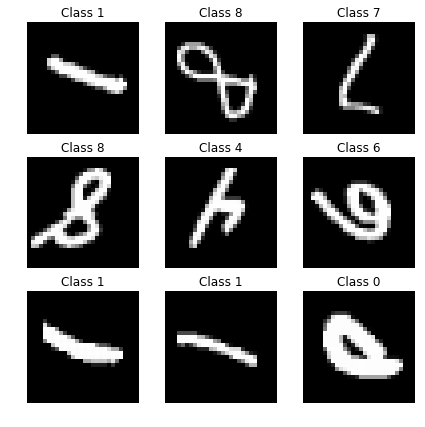

In [98]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.axis('off')
    plt.imshow(Xtrain[i,0], cmap='gray', interpolation='none')
    plt.title("Class {}".format(np.argmax(Ytrain[i])))
plt.show()

In [67]:

model = Sequential()
# first convolutional layer
model.add(Convolution2D(20, 5, 5, border_mode="same", input_shape=(1, 28, 28)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), dim_ordering="th"))
# second convolution layer
model.add(Convolution2D(50, 5, 5, border_mode="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), dim_ordering="th"))
# first fully connected layer
model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
# second fully connected layer + softmax
model.add(Dense(10))
model.add(Activation("softmax"))

In [82]:
#compile the model
#Note: we are using Adam algorithm for optimization
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

#train model
history = model.fit(Xtrain, Ytrain,
              batch_size=128, nb_epoch=3,
              show_accuracy=True, verbose=1,
              validation_data=(Xtest, Ytest))

Train on 49000 samples, validate on 21000 samples
Epoch 1/3
49000/49000 [==============================] - 9s - loss: 0.0805 - acc: 0.9747 - val_loss: 0.0820 - val_acc: 0.9730

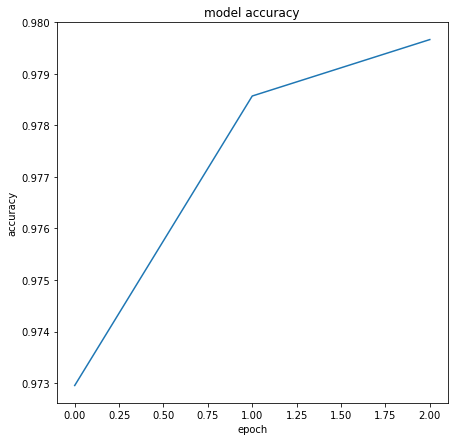

In [83]:
# summarize history for validation accuracy
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

## Finally, evaluate its performance

In [84]:
score = model.evaluate(Xtest, Ytest, show_accuracy=True, verbose=0)
print("loss on test set: %.3f, accuracy: %.3f" % (score[0], score[1]))

loss on test set: 0.063, accuracy: 0.980


In [85]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = model.predict_classes(Xtest)

# Check which items we got right / wrong
target = np.argmax(Ytest, axis=1)
correct_indices = np.nonzero(predicted_classes == target)[0]
incorrect_indices = np.nonzero(predicted_classes != target)[0]

20416/21000 [============================>.] - ETA: 0s 

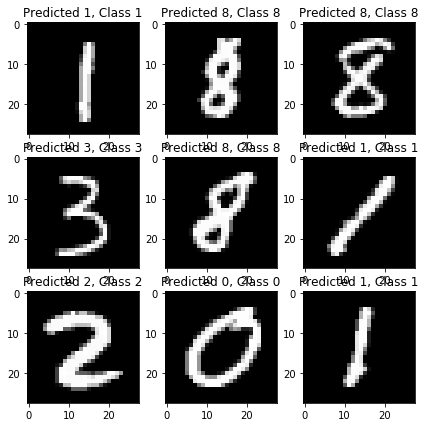

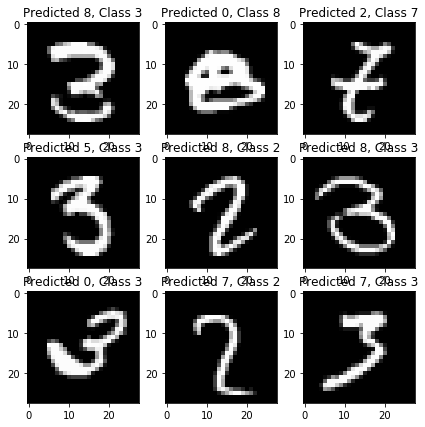

In [86]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(Xtest[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], np.argmax(Ytest[correct])))
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(Xtest[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], np.argmax(Ytest[incorrect])))